In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy
import sparse
from helpers import _generate_dist, _lesion_stats, _testFun1d

#%matplotlib inline

In [2]:
def _contour_slices(_slice, cmap="gray", total_levels=12, view='sagital'):
    # This function includes also plotting contour plot
    # link --> https://www.python-course.eu/matplotlib_contour_plot.php
    # link --> https://github.com/silx-kit/silx/issues/2242
    
    fig, axes = plt.subplots(1, 1, figsize=(16,16))
    contour_levels = total_levels
    #['sagital', 'coronal', 'axial'] --> view
    
    
    row, col = np.shape(_slice)
    y = np.arange(0, row)
    x = np.arange(0, col)
    xx, yy = np.meshgrid(x, y)


    zzmin, zzmax = np.min(_slice), np.max(_slice)
    levels = np.linspace(zzmin, zzmax, contour_levels)

    #Display image with contour plot
    #axes[i].imshow(slice.T, cmap=cmap, origin="lower")
    contour = axes.contour(yy, xx, _slice, levels)
    axes.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
    c = ('#ff0000', '#ffff00', '#0000FF', '0.6', 'c', 'm')
    axes.set_title(view)
    axes.contourf(yy, xx, _slice, colors=c)

        
    plt.show()
    
def _show_slices(_slice, cmap="gray", view='sagital'):
    # This function comes from the nibabel
    # tutorial --> https://nipy.org/nibabel/coordinate_systems.html#introducing-someone
    fig, axes = plt.subplots(1, 1, figsize=(15, 15))

    #['sagital', 'coronal', 'axial'] --> view
    axes.imshow(_slice.T, cmap=cmap, origin="lower")
    axes.set_title(view)    
    plt.show()

In [3]:
MICCAI_DIR=os.path.join("/data1/local+data", 
                         "MICCAI_2016")

print("{0}".format(80 * "-"))
print("MICCAI_DIR is {0}".format(MICCAI_DIR))
print("{0}".format(80 * "-"))

--------------------------------------------------------------------------------
MICCAI_DIR is /data1/local+data/MICCAI_2016
--------------------------------------------------------------------------------


In [4]:
# Path to the dataset and lesions

dir_dataset = os.path.join("/data1/local+data/MICCAI_2016", 
                          "Preprocessed/080_013")

lesion_path = os.path.join(dir_dataset, 'lesion_registered.nii.gz')
flair_path = os.path.join(dir_dataset, 'FLAIR_preprocessed.nii.gz')
gado_path = os.path.join(dir_dataset, 'GADO_preprocessed.nii.gz')

# Loading images
lesion = nib.load(lesion_path).get_fdata()
flair = nib.load(flair_path).get_fdata()
gado = nib.load(gado_path).get_fdata()

#Normalization
norm_f = np.linalg.norm(flair)
norm_g = np.linalg.norm(gado)

flair /= norm_f
gado /= norm_g

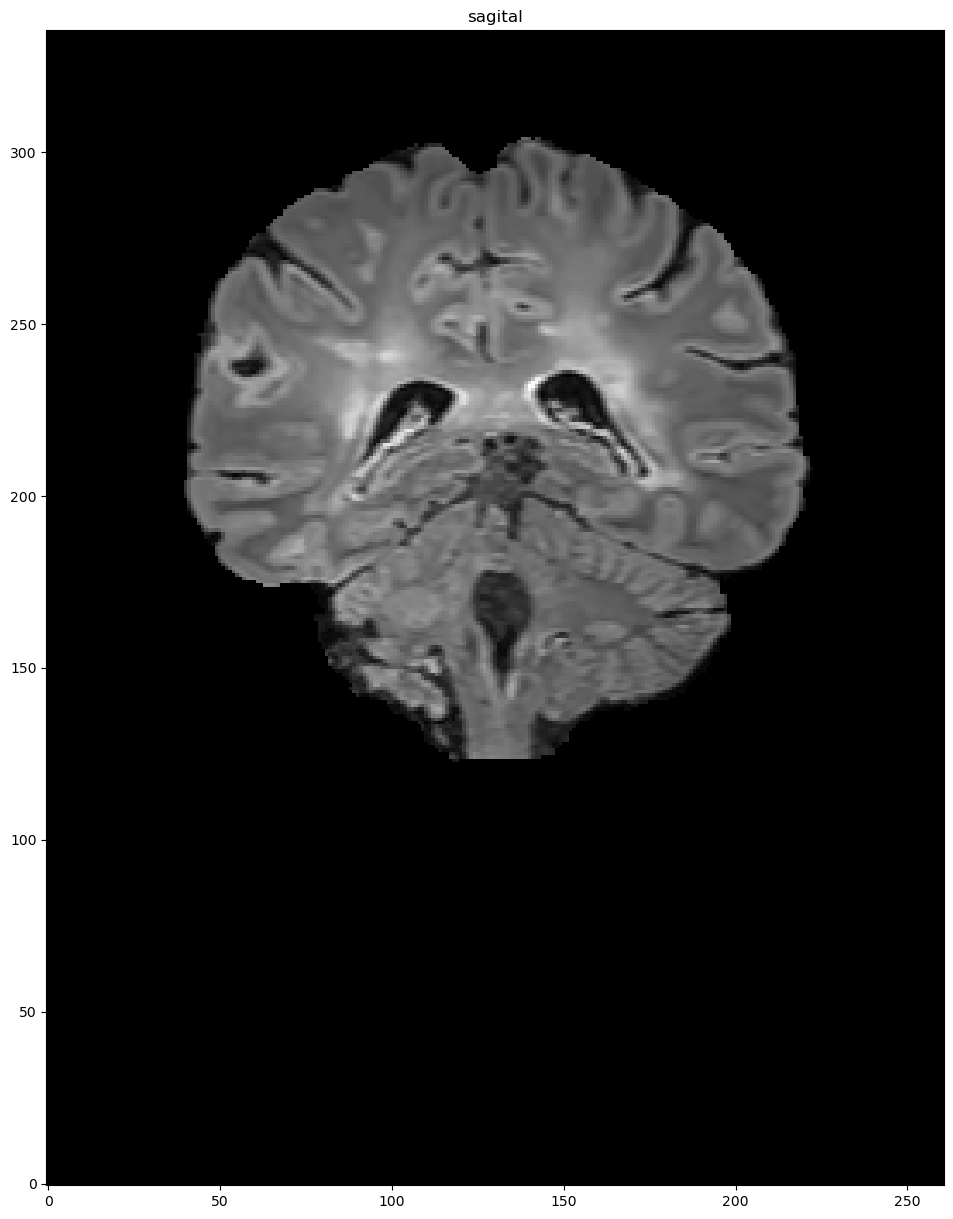

--------------------------------------------------------------------------------
flair image shape is (261, 336, 336)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Showing lesions now
--------------------------------------------------------------------------------


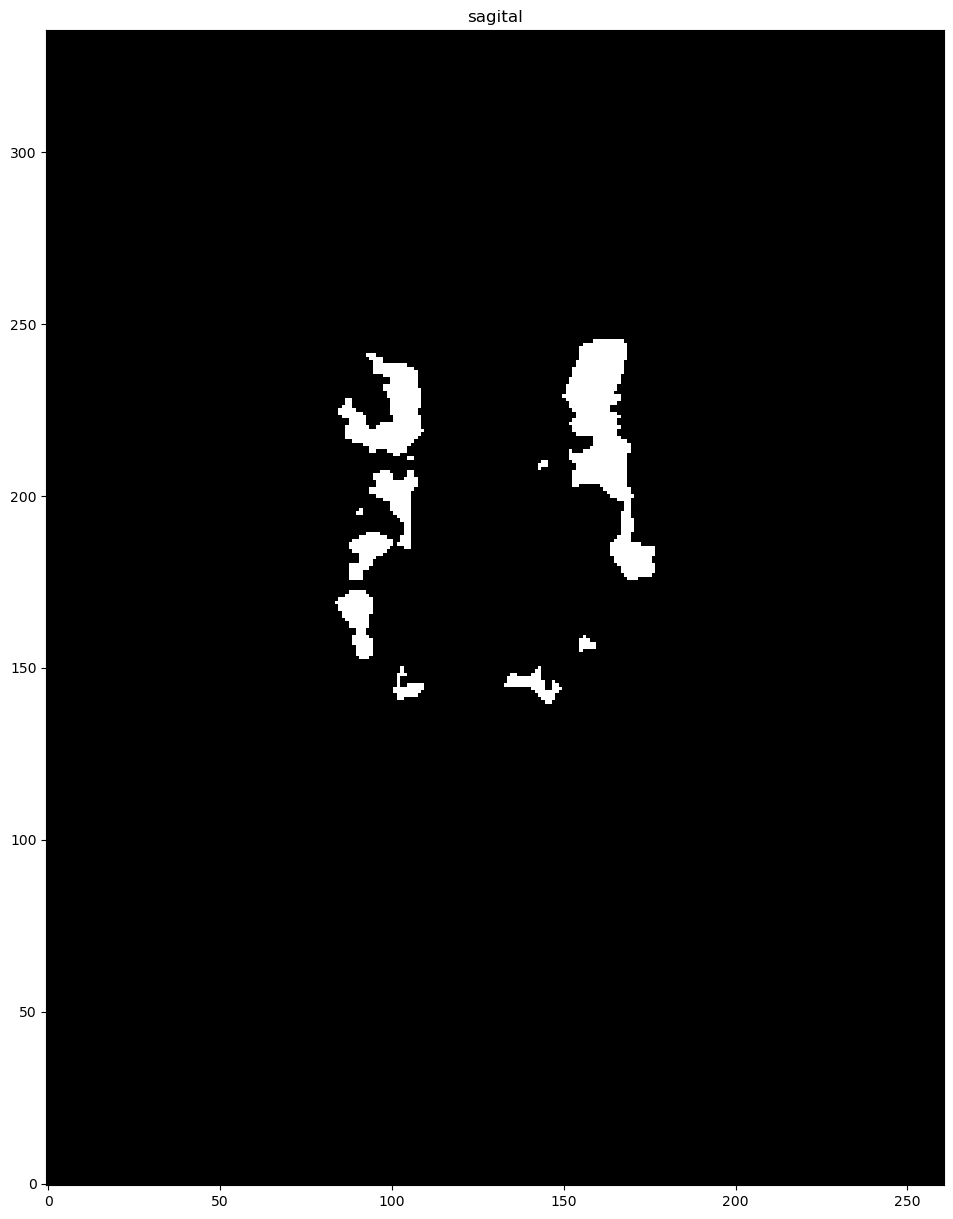

In [5]:
slice_0 = flair[50, :, :]
slice_1 = flair[:,220,:]
slice_2 = flair[:, :, 240]
_show_slices(slice_1)

print("{0}".format(80 * "-"))
print("flair image shape is {0}".format(flair.shape))
print("{0}\n".format(80 * "-"))

print("{0}".format(80 * "-"))
print("Showing lesions now")
print("{0}".format(80 * "-"))


slice_0 = lesion[50, :, :]
slice_1 = lesion[:,220,:]
slice_2 = lesion[:, :, 240]
_show_slices(slice_2)

In [6]:
print("{0}".format(80 * "-"))
print("Printing data frame table now")
print("{0}".format(80 * "-"))

props_table_df, _label_lesion = _lesion_stats(lesion)

--------------------------------------------------------------------------------
Printing data frame table now
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Printing corresponding properties for that lesion
--------------------------------------------------------------------------------
    label   area  centroid-0  centroid-1  centroid-2  axis_major_length  \
0       1  55366  137.190261  222.507315  232.830907         142.817253   
1       2     57   72.789474  183.122807  275.719298           7.259696   
2       3    566   79.104240  208.600707  195.254417          17.031013   
3       4     92   85.163043  117.619565  228.021739           7.994836   
4       5    602   90.553156  110.779070  221.448505          13.655319   
5       6   1308   99.996942  143.151376  245.194190          19.578696   
6       7     53   93.000000  163.132075  253.132075           7.617786

In [51]:
_lesion_num = 1

print("{0}".format(80 * "-"))
print("Working with lesion {0}".format(_lesion_num))
print("{0}".format(80 * "-"))

_region = _label_lesion==_lesion_num
_res = np.where(_region == True)
    
# Need to crop the image
s_min = min(_res[0])
s_max = max(_res[0])
x_min = min(_res[1])
x_max = max(_res[1])
y_min = min(_res[2])
y_max = max(_res[2])

# We need to use sparse arrays
_zoomed_lesion = _region[s_min:s_max, x_min:x_max, y_min:y_max]
_edt, _inds = _generate_dist(_zoomed_lesion)

--------------------------------------------------------------------------------
Working with lesion 1
--------------------------------------------------------------------------------


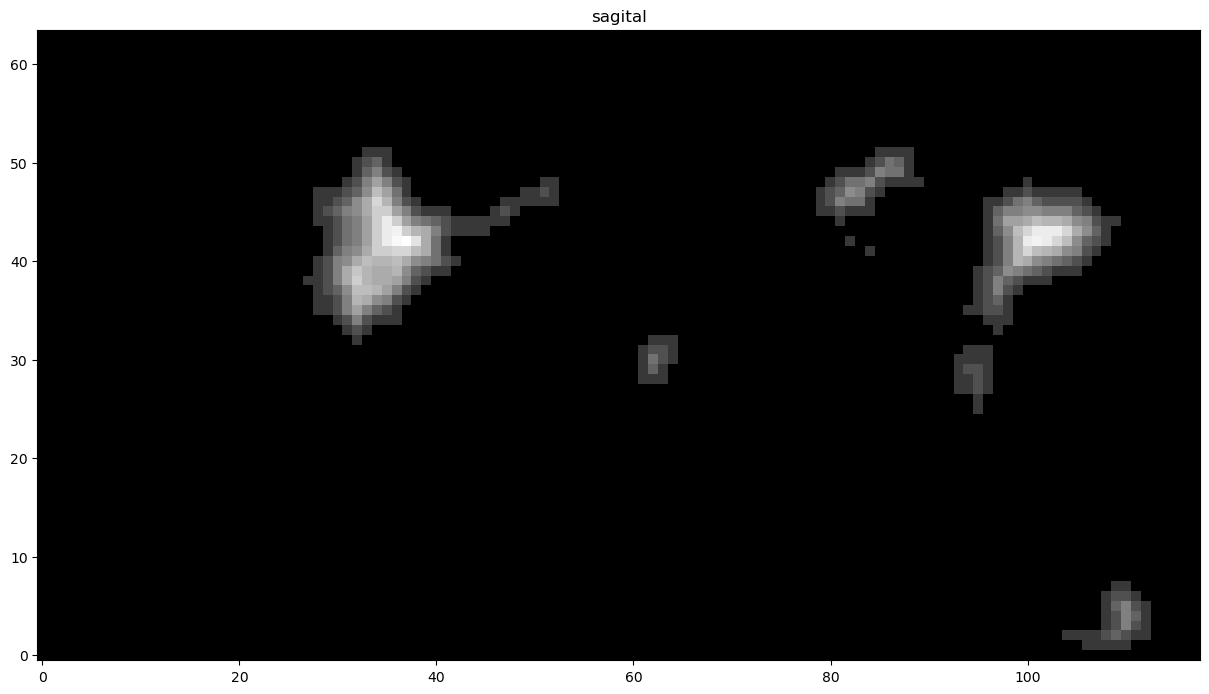

In [52]:
#slice_0 = _label_lesion[50, :, :]
#slice_1 = _label_lesion[:,240,:]
#slice_2 = _label_lesion[:, :, 200]
slice_0 = _edt[:, 5, :]
slice_1 = _edt[:, 50, :]
slice_2 = _edt[:,:,40]
_show_slices(slice_1)

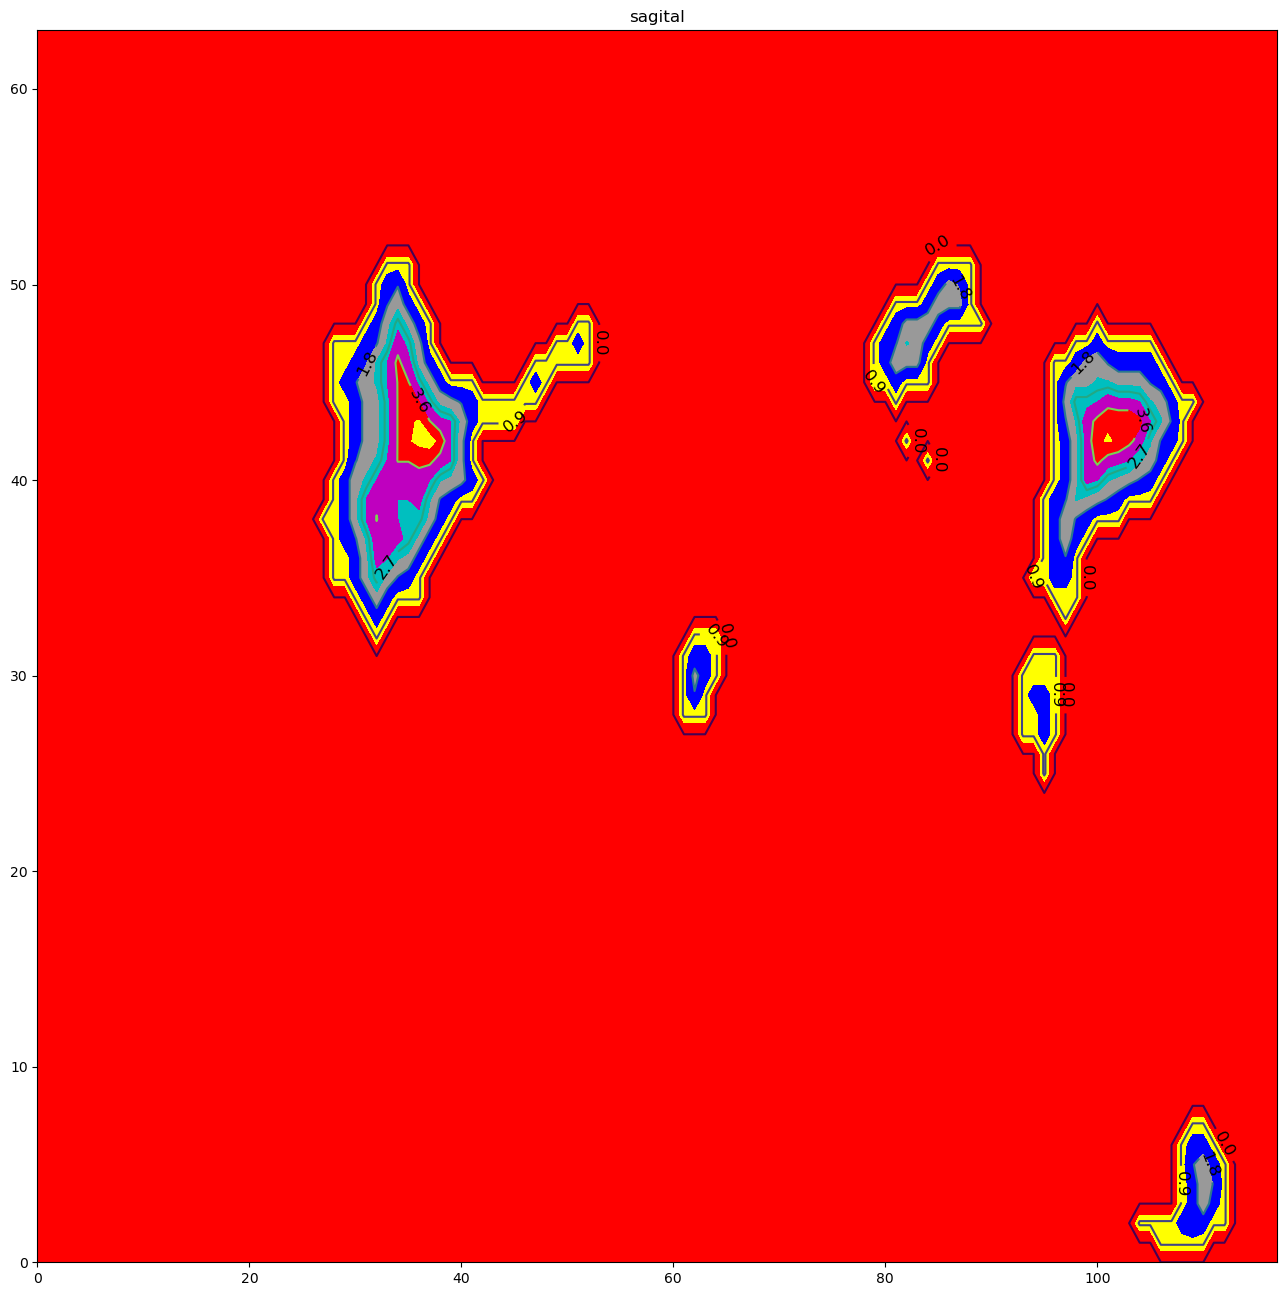

In [53]:
_contour_slices(slice_1, 'gray')

In [65]:
np.unique(slice_1)

array([0.        , 0.36787944, 0.60653066, 0.71653131, 0.77880078,
       0.81873075, 0.84648172, 0.8824969 , 0.89483932, 0.90483742,
       0.91310072, 0.92004441, 0.92596108, 0.93106278, 0.93941306,
       0.94287314, 0.94595947, 0.94872948, 0.95122942, 1.        ,
       2.        , 2.23606798, 2.44948974])

In [55]:
a = np.argwhere((slice_1 > 1.0) & (slice_1 < 1.8))
b = slice_1[a]
result, _ = _testFun1d(b)

/data1/amfm_dist_function_dev/amfm_based_distance/distance_design/helpers.py:57: RuntimeWarning: divide by zero encountered in true_divide
  f = np.exp(-1 / (z**2))


In [56]:
a

array([[ 29,  37],
       [ 29,  38],
       [ 29,  39],
       [ 29,  40],
       [ 29,  45],
       [ 30,  35],
       [ 30,  36],
       [ 30,  37],
       [ 30,  41],
       [ 30,  42],
       [ 30,  43],
       [ 30,  44],
       [ 30,  45],
       [ 30,  46],
       [ 31,  34],
       [ 31,  46],
       [ 31,  47],
       [ 32,  33],
       [ 32,  47],
       [ 32,  48],
       [ 33,  34],
       [ 33,  49],
       [ 33,  50],
       [ 34,  35],
       [ 34,  50],
       [ 35,  35],
       [ 35,  49],
       [ 36,  36],
       [ 36,  48],
       [ 37,  37],
       [ 37,  46],
       [ 38,  38],
       [ 38,  39],
       [ 38,  45],
       [ 39,  39],
       [ 40,  44],
       [ 41,  40],
       [ 41,  43],
       [ 41,  44],
       [ 47,  45],
       [ 51,  47],
       [ 62,  29],
       [ 62,  31],
       [ 63,  30],
       [ 63,  31],
       [ 80,  46],
       [ 80,  47],
       [ 81,  45],
       [ 81,  47],
       [ 81,  48],
       [ 84,  47],
       [ 84,  49],
       [ 85,

In [57]:
slice_1[a] = result

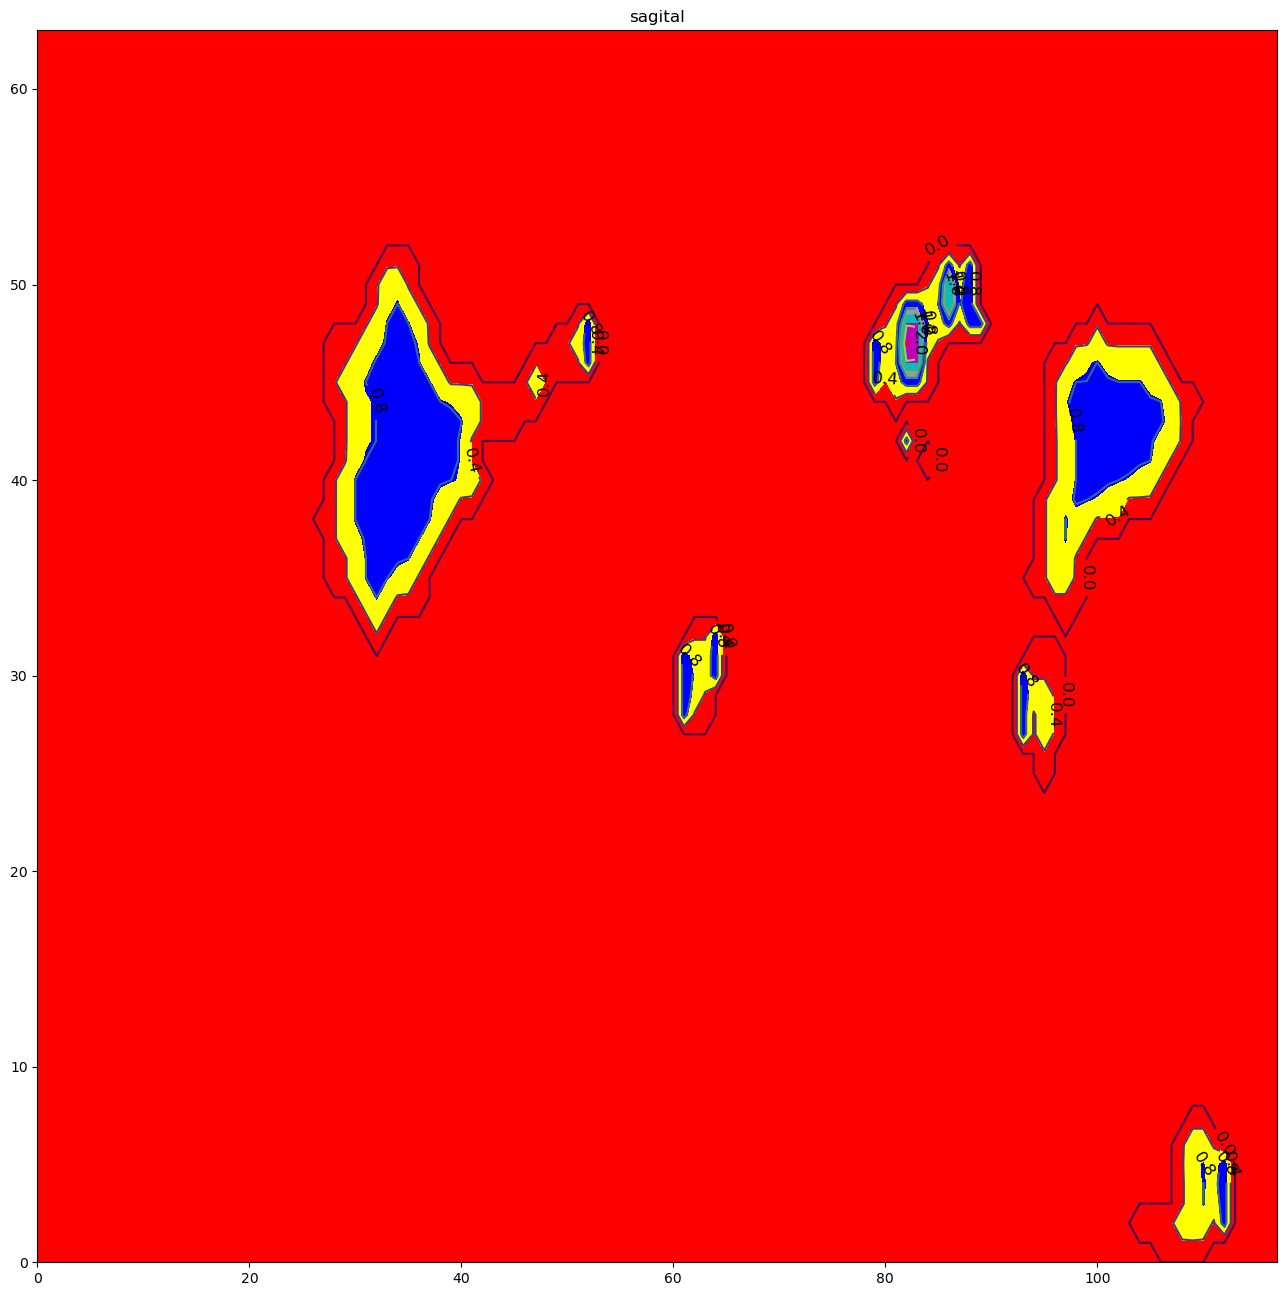

In [71]:
_contour_slices(slice_1, total_levels=7)

In [14]:
print(np.sum(slice_1))
origin_slice_1 = _edt[:,50,:]
print(np.sum(origin_slice_1))


618.7672180877737
618.7672180877737
